![](./images/EscUpmPolit_p.gif "UPM")

# Course Notes for Learning Intelligent Systems

Department of Telematic Engineering Systems, Universidad Politécnica de Madrid, © Carlos A. Iglesias

# Table of Contents
* [Objectives](#Objectives)
* [Installation](#Installation)
* [Interpretation with LIME](#Interpretation with LIME)
* [Interpretation with SHAP](#Interpretation with SHAP)
    * [Force plot](#Force plot)
    * [Mean SHAP](#Mean SHAP)
    * [Beeswarm](#Beeswarm)
* [References](#References)

# Objectives

In this session we are going to learn how to interpret and explain machine learning models.

## Load data

In [3]:
# library for displaying plots
import matplotlib.pyplot as plt

# display plots in the notebook 
%matplotlib inline

## First, we repeat the load and preprocessing steps

# Load data
from sklearn import datasets
iris = datasets.load_iris()


## Train-test splitting and preprocessing
We don't normalize to see the explanations with 'raw data', but you can try when the data is normalized.

In [4]:
# Training and test spliting
from sklearn.model_selection import train_test_split

x_iris, y_iris = iris.data, iris.target

# Test set will be the 25% taken randomly
x_train, x_test, y_train, y_test = train_test_split(x_iris, y_iris, test_size=0.25, random_state=33)

# Preprocess: normalize
#from sklearn import preprocessing
#SS = preprocessing.StandardScaler()
#scaler = SS.fit(x_train)
#x_train = scaler.transform(x_train)
#x_test = scaler.transform(x_test)

## Train model

In [5]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Create kNN model
modelKNN = KNeighborsClassifier(n_neighbors=15)

# Train the model using the training sets
modelKNN.fit(x_train, y_train) 

# Evaluate Accuracy in training

from sklearn import metrics
y_train_pred = modelKNN.predict(x_train)
print("Accuracy in training", metrics.accuracy_score(y_train, y_train_pred))

# Now we evaluate error in testing
y_test_pred = modelKNN.predict(x_test)
print("Accuracy in testing ", metrics.accuracy_score(y_test, y_test_pred))

#print metrics
print(metrics.classification_report(y_test, y_test_pred, target_names=iris.target_names))

Accuracy in training 0.9642857142857143
Accuracy in testing  0.9473684210526315
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.85      1.00      0.92        11
   virginica       1.00      0.89      0.94        19

    accuracy                           0.95        38
   macro avg       0.95      0.96      0.95        38
weighted avg       0.96      0.95      0.95        38



# Installation

In [6]:
!pip install -q shap umap-learn lime  xgboost seaborn umap

# Interpretation with LIME

Mirar https://coderzcolumn.com/tutorials/machine-learning/how-to-use-lime-to-understand-sklearn-models-predictions 

https://www.kaggle.com/code/joshuaswords/predicting-a-stroke-shap-lime-explainer-eli5/notebook

In [9]:
from lime.lime_tabular import LimeTabularExplainer

lime_explainer = LimeTabularExplainer(
    training_data=x_train,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    mode="classification",
    discretize_continuous=True
)

Next, we'll pick a sample from the testing data that we want to explain:

In [10]:
idx = 0  # index of the sample we want to explain
print(iris.feature_names)
print(x_test[idx])
print(iris.target_names)
print(y_test[idx])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[5.7 2.9 4.2 1.3]
['setosa' 'versicolor' 'virginica']
1


In [12]:
exp = lime_explainer.explain_instance(x_test[idx], modelKNN.predict_proba)

Now, we can print out the top three features that are contributing to the prediction:

In [13]:
for i in range(3):
    print(f"{exp.as_list()[i][0]}: {exp.as_list()[i][1]:.2f}")

4.00 < petal length (cm) <= 5.00: 0.53
1.25 < petal width (cm) <= 1.80: -0.06
5.65 < sepal length (cm) <= 6.33: 0.01


This tells us that the most important feature for this prediction is petal width (cm), and that a value of 0.80 or less is strongly associated with the "setosa" class.

We can also visualize the explanation using a bar chart:

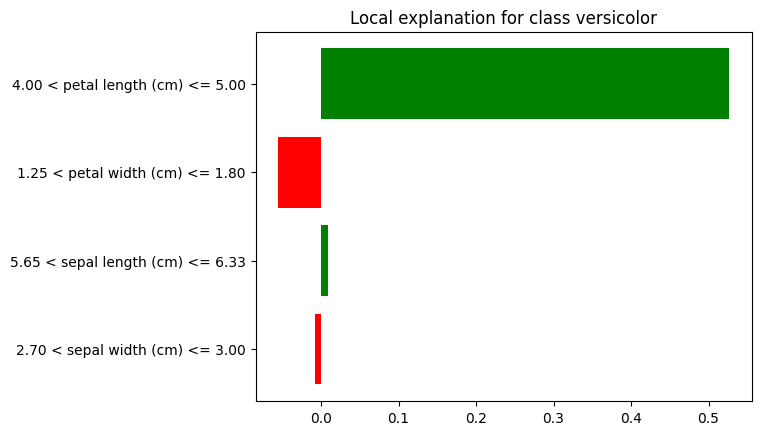

In [14]:
from lime import lime_tabular

fig = exp.as_pyplot_figure()

To start, we'll generate a of explanation for one instance in the testing dataset, next, we'll use these explanations to generate a decision plot:

In [84]:
exp = lime_explainer.explain_instance(
    data_row=x_test[1], 
    predict_fn=modelKNN.predict_proba
)

from IPython.core.display import HTML

#exp.show_in_notebook()
#exp.show_in_notebook(show_table=True) # Workaround Error with Display object
display(HTML(exp.as_html()))

# Interpretation with SHAP

In [15]:
# Init SHAP
import shap
shap.initjs()

# Get shap values
explainer = shap.Explainer(
    modelKNN.predict, x_train, feature_names=iris.feature_names)
shap_values = explainer(x_train)

print(np.shape(shap_values))

ExactExplainer explainer: 113it [00:12,  3.20it/s]                              

(112, 4)


## Force plot

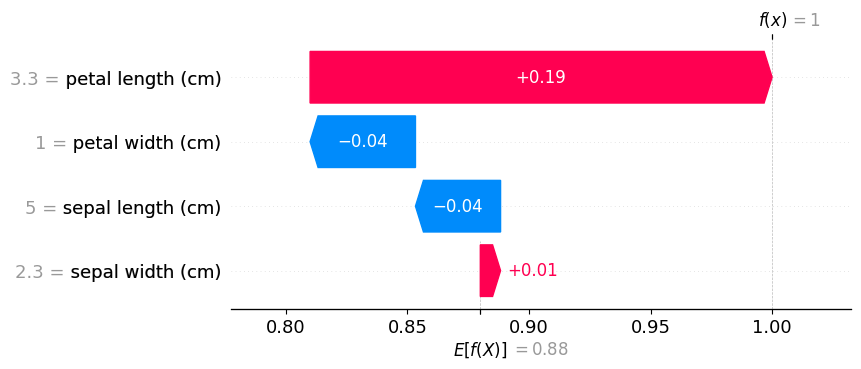

In [16]:
# Waterfall plot for first observation
shap.plots.waterfall(shap_values[0])

# Save figure
#utils.save_fig("MA5_waterfall_plot")

## Mean SHAP

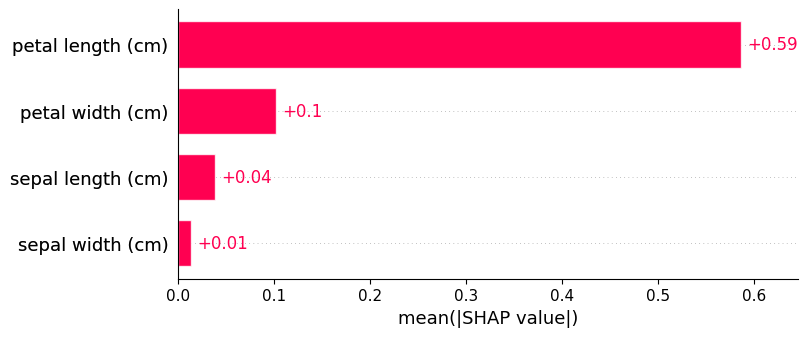

In [17]:
# Mean SHAP
shap.plots.bar(shap_values)

# Save figure
#utils.save_fig("MA5_mean_shap")

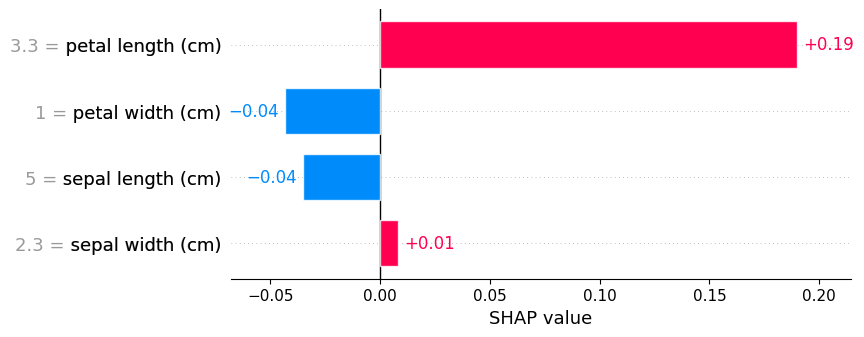

In [18]:
# Mean SHAP for one instance is very similary to force plot
shap.plots.bar(shap_values[0])

# Save figure
#utils.save_fig("MA5_mean_shap")

## Beeswarm

<Axes: xlabel='SHAP value (impact on model output)'>

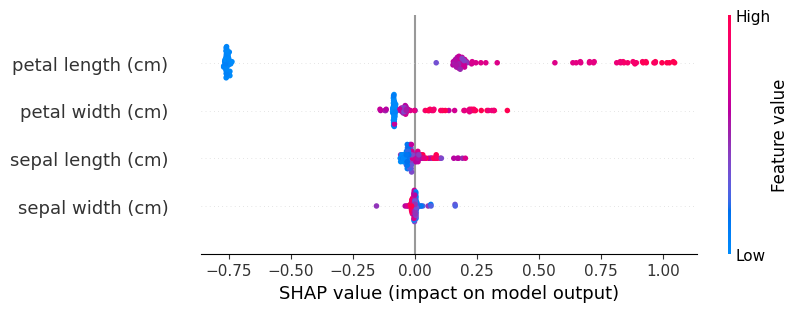

In [19]:
# Beeswarm plot
shap.plots.beeswarm(shap_values,show=False)

# Save figure
#utils.save_fig("MA5_beewarm_plot")

## References



* [Interpretability Revisited: LIME and SHAP in prose and code](https://colab.research.google.com/drive/1pjPzsw_uZew-Zcz646JTkRDhF2GkPk0N)
* [SHAP documentation](https://shap.readthedocs.io/)
* [LIME documentation](https://github.com/marcotcr/lime)

## Licence

The notebook is freely licensed under under the [Creative Commons Attribution Share-Alike license](https://creativecommons.org/licenses/by/2.0/).  

© Carlos A. Iglesias, Universidad Politécnica de Madrid.